In [109]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import google_drive
import re

### Todo:

- Standardize methods to clean data including checking for normalizing names. This should be done before starting any analysis and also before setting up the data fram we'll work with 
- Get graph output for individual exercises by name - will need a function to do this
- Get graph output of muscle groups - will also need function for this
- Add date range functionality to graphing functions

### Goal graph outputs
- Line graph x = time y = lift weight
- Do I want tabular output?
- Total volume in kg lifted is an interesting stat or total reps
- Do I want estimated one rep max?
- Track estiamted 1rm? 

Estimated 1rm
Max wt
Workout volume
Total reps
max reps
weight and reps

max distance
max time
max speed
max pace
total distance
total time

Stats for time period
- total workouts
- total sets
- total raeps
- total volume
- max wt/volume
- max reps
- estimated 1rm

Workouts by day of the week in box plots or bar graph

- could consider adding workout time started and ended

### Ideal data formating for analysis

- To start off with, I want to get the data into a nice format for analysis. I think having each row indexed by date and representing one exercise would be idea. I'm not sure if I should have each row represent just a set of an exercise though. 

- My goal plots will be time vs exercise - where exercise can be either the max lifted that day or a 1 rep max.

- I also want to see a table with date as column 1 and full set list for a specified exercise 

- These things should be in functions



## Naming conventions

Chest
- Bench press = BP
- Dumbell bench press = dumbell bp = db bp
- Dumbell incline press = DB incline press
- Barbell incline press = BB incline press
- Machine fly

Tricep
- Cable pullover
- Cable pushdown
- Close grip bench press = Close grip BP
- Barbell reverse tricep extension = Barbell reverese tricep ext
- Single arm cable extension
- Dips

Back
- Cable row
- Lat pulldown
- Dumbell row = DB row
- Smith bent row

Bicep
- BARBELL CURL = BB Curl
- CABLE CURL
- Dumbell curl = DB curl
- Hammer curl

Shoulders
- Cable side raise
- Standing bumbell shoudler press = Standing DB shoulder press
- Standing barbell shoudler press = Standing BB shoudler press
- Sitting bumbell shoudler press = Standing DB shoulder press
- Sitting barbell shoudler press = Standing BB shoudler press
- Smith seated press



Legs
- Deadlift = DL
- Squat
- Leg extension = Leg ext
- Leg curl
- Smith deadlift = Smith DL
- Smith squat
- Bulgarian split squat

Other

In [347]:
df = pd.read_excel(google_drive.get_file(), usecols=2)
df['Exercise'] = df.Exercise.str.lower().str.strip()

In [345]:
#list of acceptable naming of exercises
exercises = {
    'chest': ['bench press','bp','dumbbell incline press','db incline press',
             'barbell incline press','bb incline press','machine fly',
             'dumbbell bench press', 'dumbell bp', 'db bp'],
    
    'tricep': ['cable pullover','cable pushdown','close grip bench press',
              'close grip bp','barbell reverse tricep extension',
              'barbell reverse tricep ext', 'single arm cable extension', 'dips'],
    
    'back': ['cable row','lat pulldown','dumbbell row','db row','smith bent row'],
    
    'bicep': ['barbell curl','bb curl','cable curl','dumbbell curl',
              'db curl', 'hammer curl'],
    
    'shoulders': ['cable side raise','standing dumbbell shoulder press',
                 'standing db shoulder press','standing barbell shoulder press',
                  'standing bb shoulder press','sitting barbell shoulder press',
                  'sitting bb shoulder press','sitting dumbbell shoulder press',
                  'sitting dumbell shoulder press','smith seated press'],
    
    'legs':['deadlift','dl','squat','leg ext','leg extension','leg curl',
           'smith deadlift','smith dl','smith squat', 'bulgarian split squat']
}

In [333]:
def check_names(df):
    # Checks names of exercises
    #
    # If any are not in the exercise list, it will print
    # the bad indices and the exercise in question
    # 
    # Returns bool dataframe of indices that have
    # exercises within the list
    
    all_exercises = sum(exercises.values(), [])
    check = df.Exercise.str.lower().isin(all_exercises)
    if len(check[check == False]) > 0:        
        print("Please check naming at indeces: \n")
        print(df[check == False].Exercise)
        print('\n')
    else: 
        print('Name formatting is all good')
    return check
    
def check_sets(df):
    # Checks that set format is: reps*weight,....,reps*weight
    # 
    # If any are not in this format, will print bad indices and set in question
    #
    # Returns bool dataframe with indices that have set with proper formatting
    
    r = re.compile(r'(\d+\*\d+\.\d+,|\d+\*\d+,)*(\d+\*\d+\.\d+|\d+\*\d+)')
    s = df.Sets.astype(str)
    m = s.apply(lambda x: len(r.findall(x)) == 1)
    if len(m[m == False]) > 0:
        print('Please check set formatting at the following indices:\n')
        print(df[m == False].Sets)
    else:
        print('Set formatting all good')
    return m

In [334]:
df.head()

,Date,Exercise,Sets
0,2019-02-03,bp,"12*70,8*90,8*90,8*90,6*100,6*100"
1,2019-02-03,db incline press,"12*70,8*90,8*90,8*90"
2,2019-02-03,cable pullover,"14*30,8*42.5,8*42.5,8*42.5"
3,2019-02-03,cable pushdown,"15*30,10*42.5,8*50,5*50"
4,2019-02-04,lat pulldown,"15*35,8*50,8*50,8*50"


In [339]:
def transform(df):
    df['Date'] = df.Date.fillna(method='ffill')
    df = df.loc[(check_names(df) == True) & (check_sets(df) == True)].copy()
    df = (df.set_index(['Date','Exercise'])
         .stack()
         .str.split(',',expand=True)
         .stack()
         .unstack(-2)
         .reset_index(-1, drop=True)
         .reset_index()
         )
    sp = df.Sets.str.split('*',expand=True)
    df['reps'] = pd.to_numeric(sp[0])
    df['weight'] = pd.to_numeric(sp[1].astype(float))
    df.drop('Sets', axis=1, inplace=True)
    df.columns = ['date','exercise','reps','weight']
    return df

In [348]:
cleaned_df = transform(df)

Name formatting is all good
Set formatting all good


In [350]:
def plot_exercise(df, name):
    ex = df[df.exercise.isin(name)]
    ex.groupby('date', sort=False).weight.max().plot()
    
def plot_muscle_group(df, names):
    #plots time vs muscle group in [chest, tricep, back, bicep, shoulders, legs]
    pass

In [351]:
bp = cleaned_df[cleaned_df.exercise.isin(['bp','bench press'])]

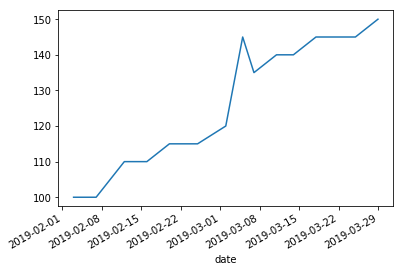

In [352]:
bp.groupby('date', sort=False).weight.max().plot()

In [324]:
cleaned_df.exercise.unique()

array(['bp', 'cable pullover', 'cable pushdown', 'db incline press',
       'cable curl', 'cable row', 'db curl', 'lat pulldown',
       'standing dumbbell shoulder press', 'smith dl',
       'smith seated press', 'smith squat', 'close grip bp',
       'smith bent row', 'leg curl', 'leg ext', 'cable side raise',
       'standing db shoulder press', 'barbell reverse tricep ext',
       'barbell curl', 'deadlift', 'squat',
       'standing barbell shoulder press', 'barbell incline press',
       'machine fly', 'dumbbell row', 'leg extension',
       'barbell reverse tricep extension'], dtype=object)

In [413]:
cleaned_df.head()

,date,exercise,reps,weight
0,2019-02-03,bp,12.0,70.0
1,2019-02-03,bp,8.0,90.0
2,2019-02-03,bp,8.0,90.0
3,2019-02-03,bp,8.0,90.0
4,2019-02-03,bp,6.0,100.0


TypeError: cannot astype a datetimelike from [datetime64[ns]] to [float64]

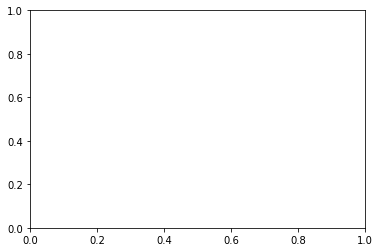

In [416]:
#which exercises have been done >5 times in the data set?
vc = cleaned_df.exercise.value_counts()
over_five = vc[vc > 5].index.tolist()

